<a href="https://colab.research.google.com/github/Seenuprime/Projects/blob/main/Time_Series_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Time Series forcasting
>In this Notebook i'm using 2 days of past data to predict the next day price,

>I'm using Stock `High` price in this Notebook to forecast Future High prices

In [1]:
import tensorflow as tf
import pandas as pd
import yfinance as yf
import numpy as np

## Getting stock data `(TataMotors)`
I'm taking 1 year of past data with 1d interval

In [2]:
stock_name = 'TATAMOTORS'
stock_data = yf.download(f'{stock_name}.NS', period='1y', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-20,566.049988,583.950012,562.500000,583.250000,579.649048,18074902
2023-06-21,584.950012,585.900024,574.500000,581.400024,577.810547,9146332
2023-06-22,584.000000,584.700012,568.200012,569.349976,565.834839,11229179
2023-06-23,570.000000,571.150024,557.700012,559.650024,556.194824,9362695
2023-06-26,560.000000,569.000000,557.799988,567.849976,564.344116,6986621
...,...,...,...,...,...,...
2024-06-13,1002.000000,1002.000000,980.750000,985.849976,985.849976,12157226
2024-06-14,990.000000,997.250000,981.400024,993.400024,993.400024,11591421
2024-06-18,1000.000000,1003.549988,984.000000,985.900024,985.900024,9845075


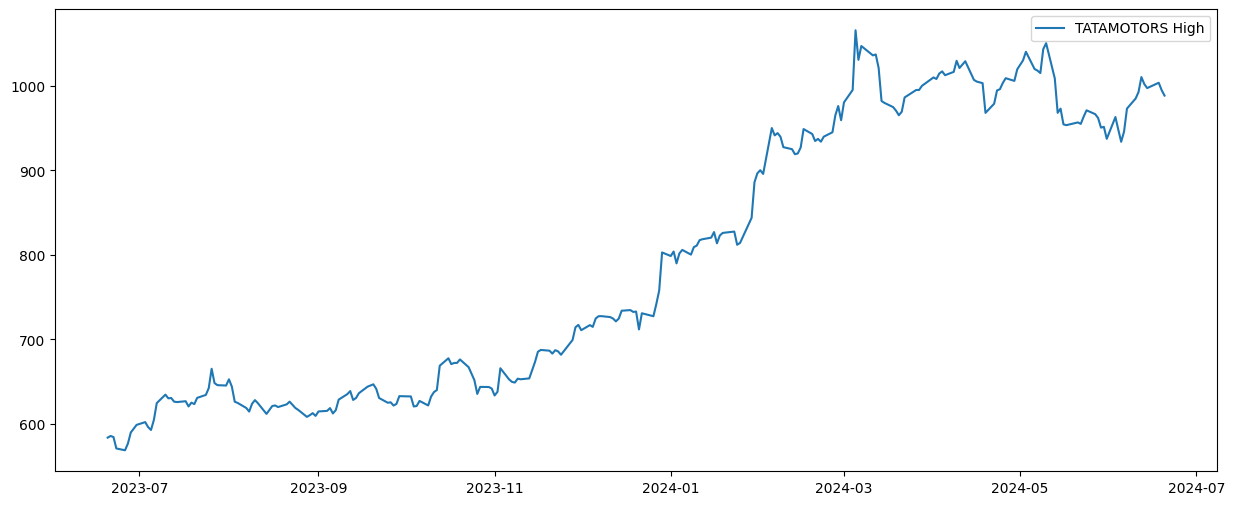

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(stock_data['High'], label=f'{stock_name} High')
plt.legend()

## Splitting the data into Train set and Test set

In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(stock_data['High'], test_size=0.2, shuffle=False)

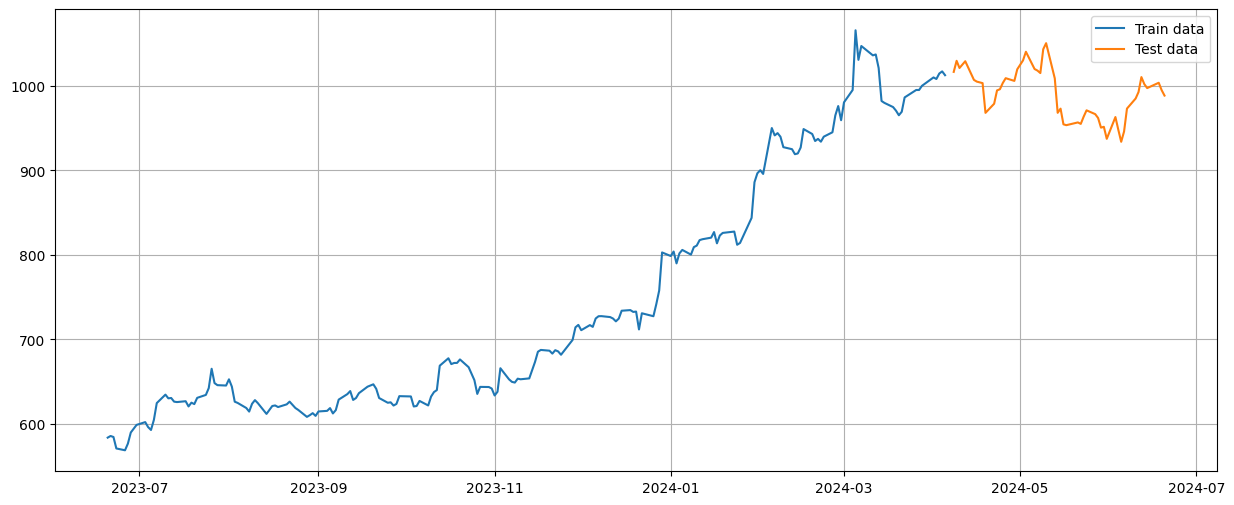

In [6]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(train_set, label='Train data')
plt.plot(test_set, label='Test data')
plt.legend()

In [7]:
train_set[:10]

Date
2023-06-20    583.950012
2023-06-21    585.900024
2023-06-22    584.700012
2023-06-23    571.150024
2023-06-26    569.000000
2023-06-27    576.900024
2023-06-28    590.000000
2023-06-30    599.000000
2023-07-03    602.299988
2023-07-04    596.400024
Name: High, dtype: float64

In [8]:
train_set = tf.expand_dims(train_set, axis=-1)
test_set = tf.expand_dims(test_set, axis=-1)
train_set[:5], test_set[:5]

(<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
 array([[583.95001221],
        [585.90002441],
        [584.70001221],
        [571.15002441],
        [569.        ]])>,
 <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
 array([[1016.40002441],
        [1029.5       ],
        [1021.        ],
        [1029.        ],
        [1006.95001221]])>)

## Scaling the data (StandardScaler)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

### Getting Features and Labels using Train set

In [10]:
X_train = []
y_train = []
for i in range(2, len(train_set)):
  X_train.append(train_set[i-2:i, 0])
  y_train.append(train_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
len(X_train), len(y_train)

(194, 194)

In [12]:
store = list(zip(X_train[:5],y_train[:5]))
store

[(array([-1.10882228, -1.09501427]), -1.1035115410482683),
 (array([-1.09501427, -1.10351154]), -1.199458776272431),
 (array([-1.10351154, -1.19945878]), -1.2146830629172347),
 (array([-1.19945878, -1.21468306]), -1.1587431231686536),
 (array([-1.21468306, -1.15874312]), -1.0659824167990908)]

In [13]:
X_train.shape

(194, 2)

## Building Model

In [14]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),

    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),

    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),

    layers.LSTM(units=50, return_sequences=False),
    layers.Dropout(0.2),

    layers.Dense(units=1)

])

In [15]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32)

Epoch 1/50
7/7 [==============================] - 17s 12ms/step - loss: 0.9932 - mae: 0.8593
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.9750 - mae: 0.8506
Epoch 3/50
7/7 [==============================] - 0s 16ms/step - loss: 0.9398 - mae: 0.8374
Epoch 4/50
7/7 [==============================] - 0s 20ms/step - loss: 0.8594 - mae: 0.8070
Epoch 5/50
7/7 [==============================] - 0s 23ms/step - loss: 0.6772 - mae: 0.7229
Epoch 6/50
7/7 [==============================] - 0s 20ms/step - loss: 0.3447 - mae: 0.5214
Epoch 7/50
7/7 [==============================] - 0s 17ms/step - loss: 0.1238 - mae: 0.2951
Epoch 8/50
7/7 [==============================] - 0s 16ms/step - loss: 0.1063 - mae: 0.2296
Epoch 9/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0482 - mae: 0.1676
Epoch 10/50
7/7 [==============================] - 0s 16ms/step - loss: 0.0518 - mae: 0.1752
Epoch 11/50
7/7 [==============================] - 0s 20ms/step - loss: 0.0323

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 2, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 2, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 2, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 2, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 2, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

## Model performance over epoch

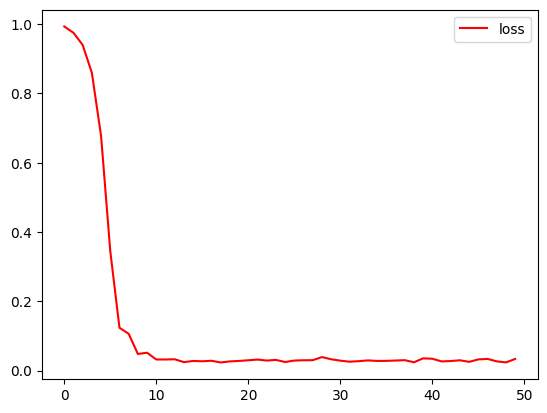

In [18]:
plt.plot(history.history['loss'], color='r', label='loss')
plt.legend()

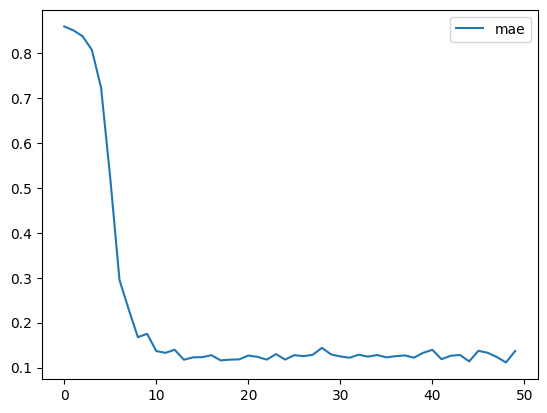

In [19]:
plt.plot(history.history['mae'], label='mae')
plt.legend()

## Predicting on Test data

### Getting Features and Labels using Test set

In [20]:
X_test = []
y_test = []
for i in range(2, len(test_set)):
  X_test.append(test_set[i-2:i, 0])
  y_test.append(test_set[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

In [21]:
len(X_test), len(y_test)

(47, 47)

In [22]:
model_preds = model.predict(X_test)

2/2 [==============================] - 2s 9ms/step


In [23]:
model_preds[:5], y_test[:5]

(array([[1.796962 ],
        [1.8342404],
        [1.8113507],
        [1.826458 ],
        [1.7539357]], dtype=float32),
 array([1.98592132, 2.04256919, 1.88643359, 1.87191766, 1.85917155]))

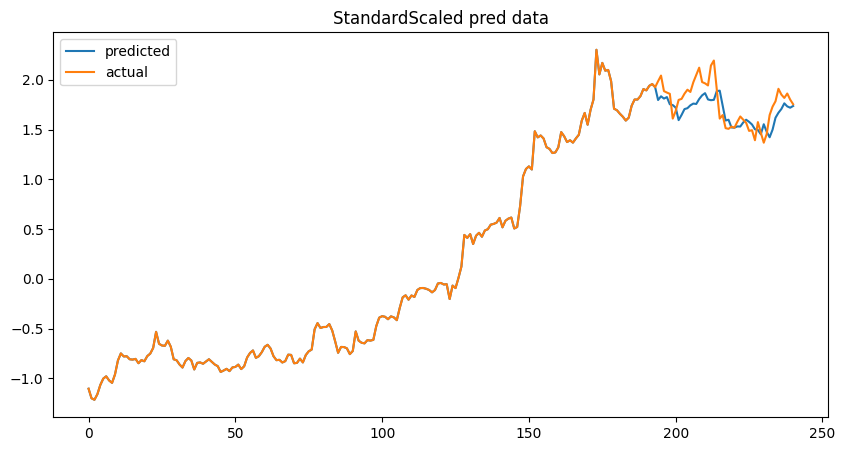

In [24]:
y_all = np.concatenate((tf.squeeze(y_train).numpy(), tf.squeeze(y_test).numpy()))
y_pred = np.concatenate((tf.squeeze(y_train).numpy(), tf.squeeze(model_preds).numpy()))

plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='predicted')
plt.plot(y_all, label='actual')
plt.title('StandardScaled pred data')
plt.legend()

In [25]:
y_train.shape, model_preds.shape

((194,), (47, 1))

In [26]:
y_train = scaler.inverse_transform(tf.expand_dims(y_train, axis=-1))
y_test = scaler.inverse_transform(tf.expand_dims(y_test, axis=-1))

model_preds = scaler.inverse_transform(model_preds)

In [27]:
y_all = np.concatenate((tf.squeeze(y_train).numpy(), tf.squeeze(y_test).numpy()))
y_pred = np.concatenate((tf.squeeze(y_train).numpy(), tf.squeeze(model_preds).numpy()))

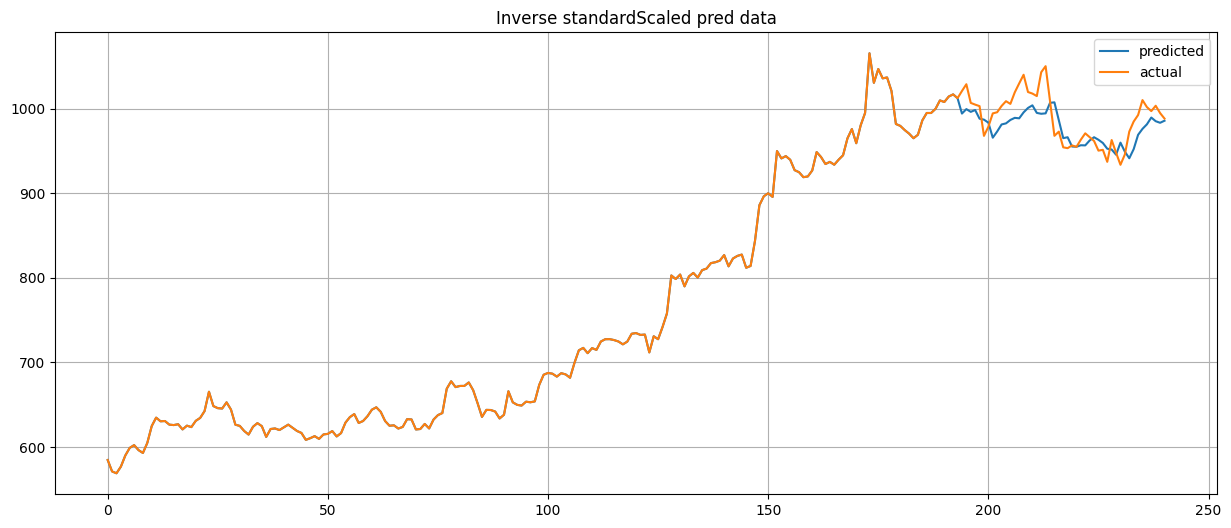

In [28]:
plt.figure(figsize=(15, 6))
plt.grid()
plt.plot(y_pred, label='predicted')
plt.plot(y_all, label='actual')
plt.title('Inverse standardScaled pred data')
plt.legend()

In [29]:
stock_data.index[-1], stock_data.index[0]

(Timestamp('2024-06-20 00:00:00'), Timestamp('2023-06-20 00:00:00'))

In [30]:
model_preds[-5:], y_test[-5:]

(array([[981.5757 ],
        [989.6003 ],
        [985.28033],
        [983.41266],
        [985.8624 ]], dtype=float32),
 array([[1002.        ],
        [ 997.25      ],
        [1003.54998779],
        [ 994.90002441],
        [ 988.40002441]]))

## Predicting for next day

In [31]:
pred_data = stock_data['High'].values[-2:]
input_data = tf.expand_dims(pred_data, axis=-1)
input_data = tf.expand_dims(input_data, axis=0)

own_pred = model.predict(input_data)

print('Predicted for date:', stock_data.index[-1]+pd.Timedelta(days=1))
print('Raw predicted:', tf.squeeze(own_pred).numpy())
print('Inverse transformed:', tf.squeeze(scaler.inverse_transform(own_pred)).numpy())

1/1 [==============================] - 2s 2s/step
Predicted for date: 2024-06-21 00:00:00
Raw predicted: 2.7713275
Inverse transformed: 1131.9177
